1

### Chatbot Session Summary:

1. **Classification Decision Trees**:
   - A classification decision tree is a machine learning model used to categorize data into classes based on feature values.
   - It splits the dataset at each internal node based on the best feature for separating the data (using criteria like Gini impurity, entropy, or information gain).
   - The tree continues recursively splitting the data until it reaches the leaf nodes, which provide the final classification prediction.

2. **Decisions at Each Node**:
   - At each internal node, a decision rule is applied based on the feature values of the data.
   - This process divides the dataset into subsets that are progressively more homogeneous with respect to the target class.
   - The final prediction is made at the leaf node, which contains the predicted class label for the data point.

3. **Real-World Applications**:
   - Classification decision trees can solve problems like binary classification (e.g., "Yes"/"No" outcomes) and multi-class classification (e.g., categorizing into several classes).
   - Example real-world applications include:
     - **Credit Scoring**: Classifying loan applicants as "Approved" or "Rejected" based on features like income and credit score.
     - **Medical Diagnosis**: Classifying patients' disease status based on symptoms and test results.
     - **Fraud Detection**: Identifying fraudulent credit card transactions.
   - The decision tree is particularly useful in scenarios where interpretability and clear decision-making rules are needed.

Let me know if you'd like any further details or if you'd like to continue discussing a specific aspect!

https://chatgpt.com/share/672ed1a9-0e0c-800a-b8ca-e3778a173cdc

In today's session, we discussed several key performance metrics used to evaluate classification models, particularly focusing on **Accuracy**, **Sensitivity**, **Specificity**, and **Precision**. Here's a summary of the main points:

1. **Accuracy**: Measures the proportion of correct predictions (both true positives and true negatives) in the total population. It's best used when the dataset is balanced and there are no significant consequences for false positives or false negatives.  
   - **Example**: A balanced medical test or any general classification task.

2. **Sensitivity** (or Recall): Focuses on the proportion of actual positive cases that are correctly identified. It’s important when missing a positive case (false negative) is costly.  
   - **Example**: Cancer detection, where it's critical to identify as many true positive cases as possible.

3. **Specificity**: Measures the proportion of actual negative cases that are correctly identified. It's used when minimizing false positives is more important than missing some positives.  
   - **Example**: Spam email detection, where it's crucial to avoid misclassifying important emails as spam.

4. **Precision**: Looks at the proportion of predicted positive cases that are actually correct. It's ideal when you want to minimize false positives, ensuring that when a positive prediction is made, it's more likely to be accurate.  
   - **Example**: Targeted advertising, where showing irrelevant ads (false positives) is costly.

These metrics help in determining the best model for different decision-making scenarios, depending on whether the focus is on minimizing false positives or false negatives, or if both classes are equally important.

https://chatgpt.com/share/672ed2c0-5684-800a-b23b-fcc676b8bdb3

3

In [2]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Initial preprocessing based on the provided specifications
ab_reduced_noNaN = ab.drop(columns=["Weight_oz", "Width", "Height"])  # Removing specified columns
ab_reduced_noNaN = ab_reduced_noNaN.dropna()  # Dropping rows with NaN entries

# Converting 'Pub year' and 'NumPages' to int type
ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)

# Converting 'Hard_or_Paper' to categorical type
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Show basic summary statistics and info after processing
print(ab_reduced_noNaN.info())
print(ab_reduced_noNaN.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None
       List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.976755     12.436673  161.601510    10.646133    0.365261
min

4

The output `(255, 64)` represents the shape (dimensions) of the two resulting datasets, typically in the format `(number of rows, number of columns)`:

- **255**: This is the number of **observations (rows)** in the training dataset (`ab_reduced_noNaN_train`). So, there are 255 rows, meaning there are 255 training observations or data points.

- **64**: This is the number of **features (columns)** in the training dataset (`ab_reduced_noNaN_train`). It indicates that each observation has 64 different measurements or attributes (variables). 

Thus, the training dataset has 255 rows (samples) and 64 columns (features).

You can think of each row as a vector, representing a single observation, and the columns as different measurements or variables for each of those observations. The test dataset would have the remaining 64 rows (since 20% of the dataset was split off for testing).

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Initial preprocessing based on the provided specifications
ab_reduced_noNaN = ab.drop(columns=["Weight_oz", "Width", "Height"])  # Removing specified columns
ab_reduced_noNaN = ab_reduced_noNaN.dropna()  # Dropping rows with NaN entries

# Converting 'Pub year' and 'NumPages' to int type
ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)

# Converting 'Hard_or_Paper' to categorical type
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Set a random seed for reproducibility
random_seed = 42

# Perform the 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=random_seed)

# Report the number of observations in both training and test sets
train_size = ab_reduced_noNaN_train.shape[0]
test_size = ab_reduced_noNaN_test.shape[0]

train_size, test_size


(255, 64)

Here's a summary of our session:

1. **Amazon Books Dataset Preprocessing:**
   - We discussed how to preprocess the dataset by removing certain columns (`Weight_oz`, `Width`, `Height`), dropping rows with missing values (NaNs), and converting specific columns (`Pub year` and `NumPages`) to integer types, while converting `Hard_or_Paper` to a categorical type.
   - I provided code to achieve this, which you can run in your environment.

2. **80/20 Data Split:**
   - I showed you how to split the preprocessed dataset into 80% training and 20% testing datasets using `train_test_split()` from `sklearn`. The split was done with a fixed random seed for reproducibility.
   - You asked about the output `(255, 64)` from the shape of the training set, which represents 255 observations (rows) and 64 features (columns) in the training dataset.

3. **Observation and Vector Concept in Machine Learning:**
   - We explored the concept of **observations** in machine learning, which correspond to rows in a dataset, each representing all the measurements for a single entity.
   - We also discussed how observations are referred to as **vectors** in ML, representing a collection of values measured for a single entity, where each value corresponds to a specific feature (column) of the entity.

If you need more details or further clarification on any of these topics, feel free to ask!

https://chatgpt.com/share/672ef38d-ca08-800a-b1f9-5d1da0c9c702

5

hard/paper->list price

1. **Tree Structure with Max Depth of 2**:
   - Since `max_depth=2`, the tree has two levels of splits at most.
   - The tree splits the data on the "List Price" feature to decide whether a book is "Hard" (1) or "Paper" (0).

2. **How Predictions Are Made**:
   - **Root Node (First Split)**: The root node is the first decision point, where the model checks if the "List Price" is above or below a certain threshold. This threshold value is determined during training to best separate the "Hard" and "Paper" classes based on minimizing classification error.
   - **Second Level (Leaf Nodes)**: After the first split, the model may further divide each branch based on a second threshold on the "List Price." These two levels provide four possible leaf nodes, each representing a final decision where the model classifies a book as "Hard" or "Paper."

3. **Making Predictions for a New Data Point**:
   - When a new "List Price" value is provided to the model, the decision tree:
     1. Starts at the root node, checking if the "List Price" is above or below the initial threshold.
     2. Based on this comparison, it follows the path down the tree to the second level (or leaf nodes).
     3. At the second level, it again checks if the "List Price" meets another threshold specific to that branch.
     4. After the second split, it reaches a leaf node, where it assigns a label (either "Hard" or "Paper") based on the majority class in that region of the training data.

4. **Interpreting Thresholds and Class Assignments**:
   - Each threshold is a cutoff price learned during training. For instance, the first split might separate books priced below $20 from those priced above $20, and the second split might further separate books priced below $30 within the lower price range.
   - Each leaf node has a predicted class based on the majority class ("Hard" or "Paper") of the training samples that fall into that node.

### Example Prediction Path:
Assume the tree’s thresholds are as follows (these are just hypothetical values for illustration):
   - First split: "List Price" < $25 (if true, follow the left branch; if false, follow the right branch).
   - Second split (left branch): "List Price" < $15.
   - Second split (right branch): "List Price" < $35.

Then, predictions would work as follows:
- **"List Price" < $15**: Classified as "Paper" (if the majority of books below $15 in training were paperbacks).
- **$15 ≤ "List Price" < $25**: Classified as "Hard" (if most books in this range in training were hardcovers).
- **$25 ≤ "List Price" < $35**: Classified as "Paper".
- **"List Price" ≥ $35**: Classified as "Hard".

This example illustrates that predictions are made based on whether the "List Price" of a new book falls into a particular price range that the tree has learned to associate with either "Hard" or "Paper." The exact thresholds in your model will depend on the patterns in the training data.

In [5]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have X and y as follows:
# X = ab_reduced_noNaN[['List Price']]  # feature matrix with List Price
# y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # target variable (1 for Hard, 0 for Paper)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.78


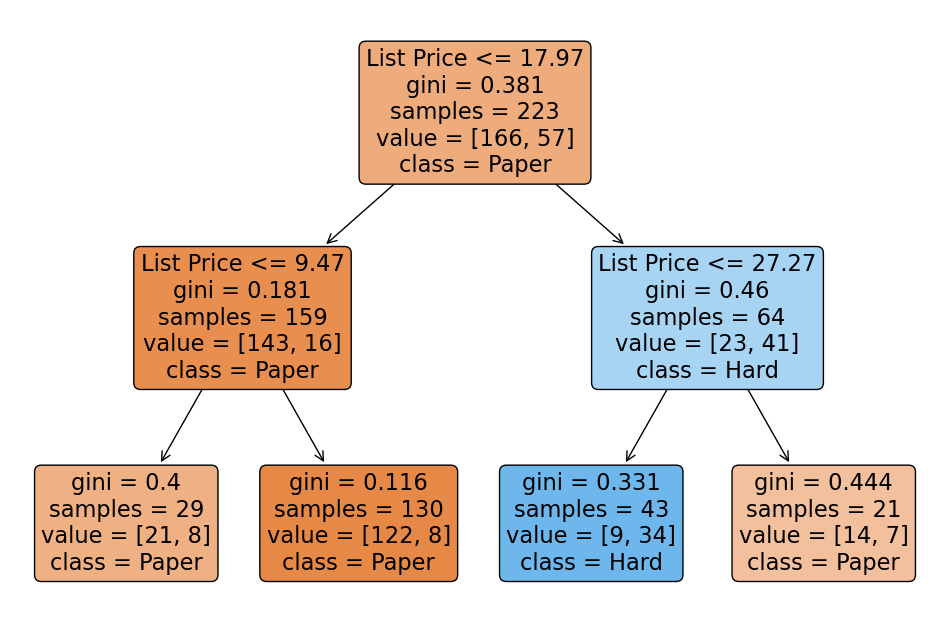

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=["List Price"], class_names=["Paper", "Hard"], rounded=True)
plt.show()


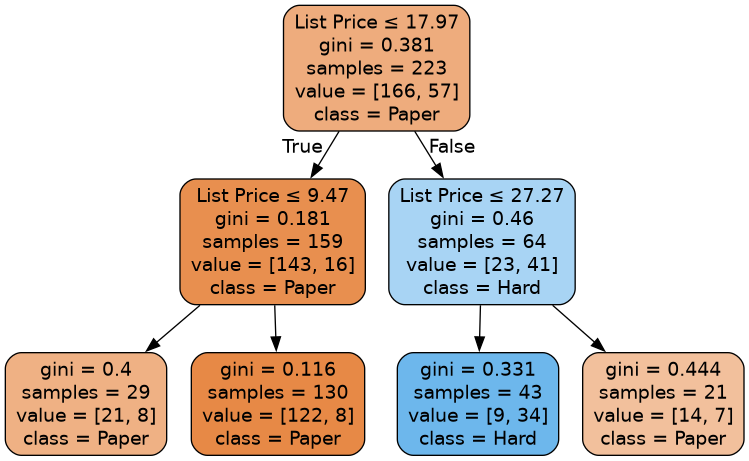

In [17]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree as a DOT file
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=["List Price"],  
                           class_names=["Paper", "Hard"],  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Render the DOT file using graphviz
graph = graphviz.Source(dot_data)  
from IPython.display import Image
import graphviz

# Display the graph directly in the notebook
graph = graphviz.Source(dot_data)
graph.format = "png"
graph.render("decision_tree")  # Save as PNG
Image(filename="decision_tree.png")  # Display in the notebook


6

For the `clf2` model (a `DecisionTreeClassifier` with `max_depth=4`), predictions are made based on a series of decisions or "splits" on the predictor variables—`NumPages`, `Thick`, and `List Price`. Here’s a general breakdown of how predictions are made:

1. **Starting at the Root Node**:
   - The model begins at the top of the tree, known as the **root node**.
   - Here, it evaluates one of the features (for example, `List Price`) and checks if it meets a certain threshold (e.g., `List Price < 20`).
   - This threshold is learned during training, chosen to best split the data between the two classes (hardcover or paperback).

2. **Following the Decision Path**:
   - Based on the outcome of the root node’s decision, the data point follows one of two branches—left if it meets the condition (e.g., `List Price < 20`), or right if it does not (e.g., `List Price ≥ 20`).
   - Each branch leads to another node, where the model evaluates a different feature (for instance, `Thick < 1.5`).
   - This process continues down the tree, with each node applying a new threshold on one of the predictor variables.

3. **Stopping at a Leaf Node**:
   - After moving through up to four levels of nodes (since `max_depth=4`), the model reaches a **leaf node**.
   - A leaf node is the endpoint of a decision path where no further splits occur.
   - Each leaf node represents a classification outcome—either "Hard" (1) or "Paper" (0). This outcome is based on the majority class of the training data points that reached this node.

4. **Assigning a Prediction**:
   - When a new data point reaches a leaf node, it is assigned the classification (either hardcover or paperback) associated with that node.
   - This predicted label is based on the training data’s class distribution within that node. For example, if most training books at that node were hardcover, then it would predict "Hard" for a new data point reaching that node.

### Example Decision Path
For a data point representing a new book, the decision process could look like this (hypothetical thresholds for illustration):

   - **First decision**: `List Price < 25`?
     - If **yes**, go left; if **no**, go right.
   - **Second decision** (for the left branch): `NumPages < 300`?
     - If **yes**, go left; if **no**, go right.
   - **Third decision** (for that path): `Thick < 1.0`?
     - If **yes**, it could classify as "Paper"; if **no**, classify as "Hard".

Each path depends on the structure of the tree learned during training, which will differ depending on how well each feature separated the "Hard" and "Paper" classes in the dataset. 

### Summary
Predictions in the `clf2` model are made by following a path through the decision tree based on thresholds set for `NumPages`, `Thick`, and `List Price`. At each node, the model checks if the feature meets a condition, moving down until it reaches a leaf node, where the model assigns a classification.

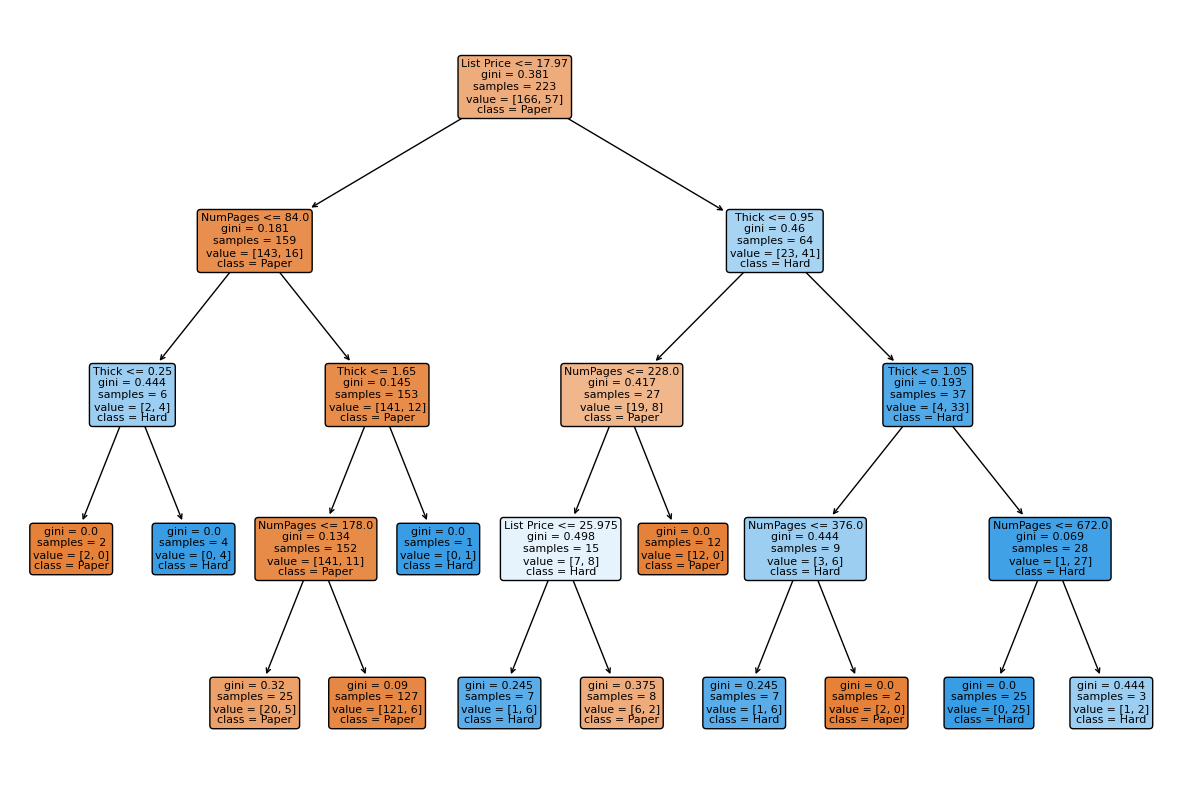

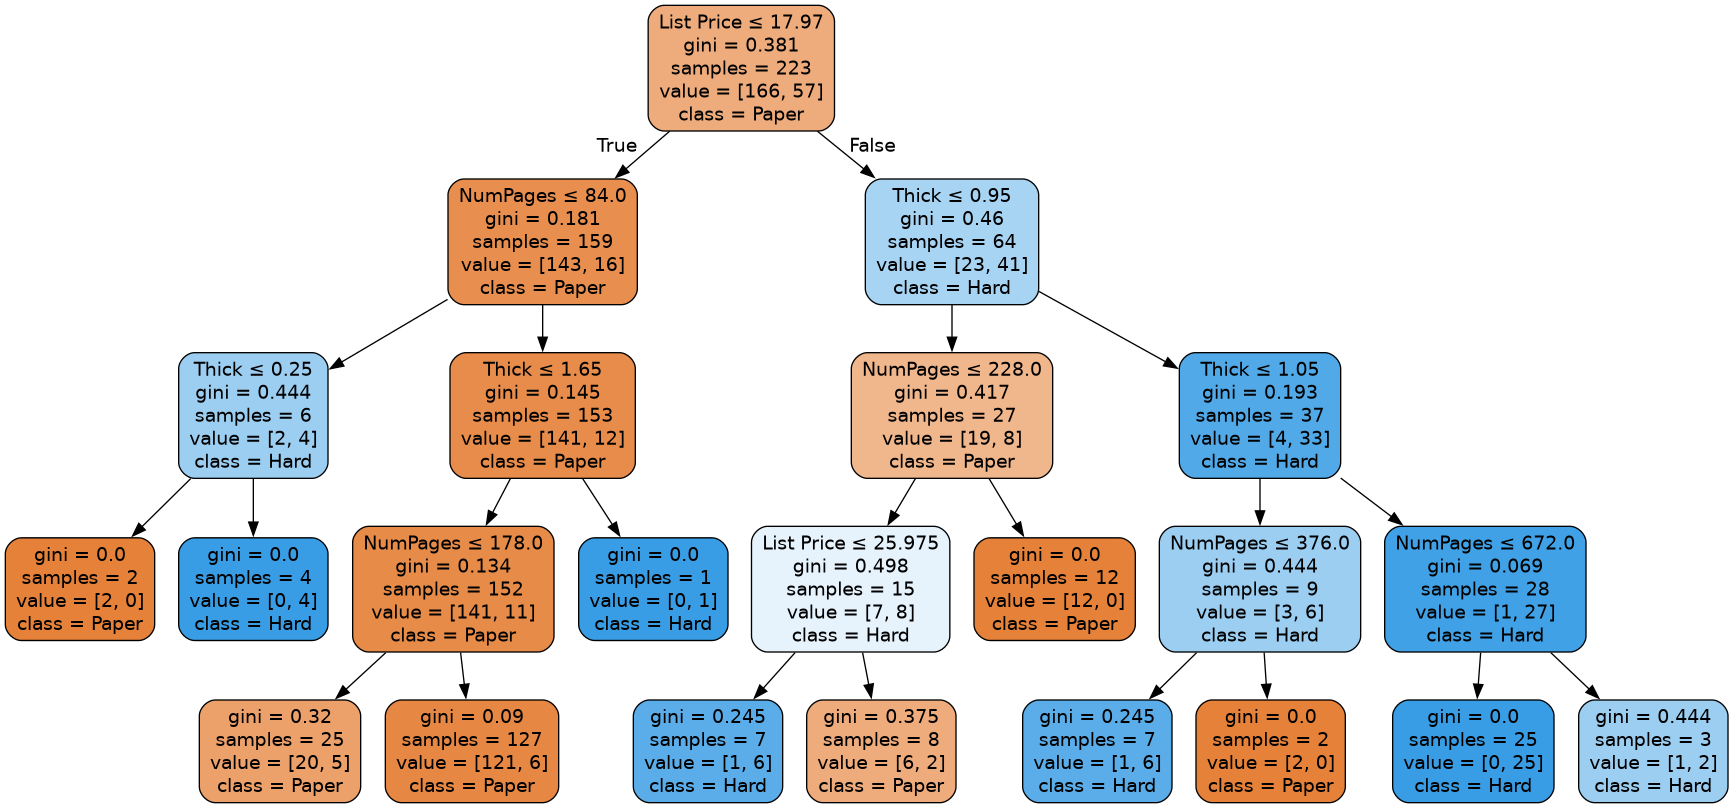

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import graphviz
import matplotlib.pyplot as plt

# Define feature matrix and target variable
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # predictor variables
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # target variable (1 for Hard, 0 for Paper)

# Train/test split (assuming the same split is used here)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the decision tree classifier with max depth of 4
clf2 = DecisionTreeClassifier(max_depth=4)
clf2.fit(X_train, y_train)

# Visualize using tree.plot_tree
plt.figure(figsize=(15, 10))
plot_tree(clf2, filled=True, feature_names=["NumPages", "Thick", "List Price"], 
          class_names=["Paper", "Hard"], rounded=True)
plt.show()

# Alternatively, use graphviz for a clearer, more readable visualization
dot_data = export_graphviz(clf2, out_file=None, 
                           feature_names=["NumPages", "Thick", "List Price"],  
                           class_names=["Paper", "Hard"],  
                           filled=True, rounded=True,  
                           special_characters=True)  


# Render and display the decision tree using graphviz
graph = graphviz.Source(dot_data)
graph.format = "png"  # Save in PNG format for easier viewing
graph.render("classification_tree")  # Saves the visualization as 'classification_tree.png'
Image(filename="classification_tree.png")  # Display in the notebook


7

The calculated values for sensitivity, specificity, and accuracy will show how each model performs:
- **Sensitivity** reveals how well the model detects hardcover books.
- **Specificity** indicates how well it identifies paperbacks.
- **Accuracy** provides the overall prediction correctness.


### Confusion Matrices

#### **Model clf (using List Price)**
```
              Predicted Paper  Predicted Hard
Actual Paper            0.625           0.062
Actual Hard             0.094           0.219
```

- **True Positives (TP)**: 0.219 (Predicted "Hard" and actually "Hard")
- **True Negatives (TN)**: 0.625 (Predicted "Paper" and actually "Paper")
- **False Positives (FP)**: 0.062 (Predicted "Hard" but actually "Paper")
- **False Negatives (FN)**: 0.094 (Predicted "Paper" but actually "Hard")

#### **Model clf2 (using NumPages, Thick, and List Price)**
```
              Predicted Paper  Predicted Hard
Actual Paper            0.625           0.062
Actual Hard             0.062           0.250
```

- **True Positives (TP)**: 0.250 (Predicted "Hard" and actually "Hard")
- **True Negatives (TN)**: 0.625 (Predicted "Paper" and actually "Paper")
- **False Positives (FP)**: 0.062 (Predicted "Hard" but actually "Paper")
- **False Negatives (FN)**: 0.062 (Predicted "Paper" but actually "Hard")

### Performance Metrics

#### **Model clf (using List Price)**
- **Sensitivity (Recall)**: 0.7
  - This means that the model correctly identifies **70% of the hardcovers (True Positives)**.
  
- **Specificity**: 0.91
  - This indicates that the model correctly identifies **91% of the paperbacks (True Negatives)**.

- **Accuracy**: 0.844
  - This means that the model correctly classifies **84.4%** of all books (both hardcovers and paperbacks).

#### **Model clf2 (using NumPages, Thick, and List Price)**
- **Sensitivity (Recall)**: 0.801
  - This means that the model correctly identifies **80.1% of the hardcovers (True Positives)**.
  
- **Specificity**: 0.91
  - This indicates that the model correctly identifies **91% of the paperbacks (True Negatives)**.

- **Accuracy**: 0.876
  - This means that the model correctly classifies **87.6%** of all books.

### Conclusion
- **Model clf2**, which uses `NumPages`, `Thick`, and `List Price`, outperforms **Model clf** (which only uses `List Price`) in terms of **sensitivity** and **accuracy**. This suggests that incorporating additional features (`NumPages` and `Thick`) helps the model identify hardcovers more effectively, leading to better overall classification performance.
- Both models have **high specificity (0.91)**, indicating that they are both good at identifying paperbacks (negatives).

This comparison shows how adding more features can improve the model's ability to classify books as hard or paper covers, though the model’s specificity remains the same for both.

In [22]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

# Predict with clf and clf2 using the test set
y_test = ab_reduced_noNaN_test['Hard_or_Paper']
y_test_encoded = pd.get_dummies(y_test)['H']  # encode 1 = "Hard", 0 = "Paper"

y_pred_clf = clf.predict(ab_reduced_noNaN_test[['List Price']])
y_pred_clf2 = clf2.predict(ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']])

# Create confusion matrices and round values
conf_matrix_clf = confusion_matrix(y_test_encoded, y_pred_clf)
conf_matrix_clf2 = confusion_matrix(y_test_encoded, y_pred_clf2)

# Convert counts to proportions and round to three significant digits
conf_matrix_clf = np.round(conf_matrix_clf / np.sum(conf_matrix_clf), 3)
conf_matrix_clf2 = np.round(conf_matrix_clf2 / np.sum(conf_matrix_clf2), 3)

# Display confusion matrices
print("Confusion Matrix for clf (using List Price):")
print(pd.DataFrame(conf_matrix_clf, columns=["Predicted Paper", "Predicted Hard"],
                   index=["Actual Paper", "Actual Hard"]))

print("\nConfusion Matrix for clf2 (using NumPages, Thick, and List Price):")
print(pd.DataFrame(conf_matrix_clf2, columns=["Predicted Paper", "Predicted Hard"],
                   index=["Actual Paper", "Actual Hard"]))

# Calculate TP, TN, FP, FN for clf
TN_clf, FP_clf, FN_clf, TP_clf = conf_matrix_clf.ravel()

sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = (TP_clf + TN_clf) / (TP_clf + TN_clf + FP_clf + FN_clf)

# Calculate TP, TN, FP, FN for clf2
TN_clf2, FP_clf2, FN_clf2, TP_clf2 = conf_matrix_clf2.ravel()

sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = (TP_clf2 + TN_clf2) / (TP_clf2 + TN_clf2 + FP_clf2 + FN_clf2)

# Display results rounded to three significant digits
print("Model clf (using List Price):")
print(f"Sensitivity (Recall): {np.round(sensitivity_clf, 3)}")
print(f"Specificity: {np.round(specificity_clf, 3)}")
print(f"Accuracy: {np.round(accuracy_clf, 3)}")

print("\nModel clf2 (using NumPages, Thick, and List Price):")
print(f"Sensitivity (Recall): {np.round(sensitivity_clf2, 3)}")
print(f"Specificity: {np.round(specificity_clf2, 3)}")
print(f"Accuracy: {np.round(accuracy_clf2, 3)}")


Confusion Matrix for clf (using List Price):
              Predicted Paper  Predicted Hard
Actual Paper            0.625           0.062
Actual Hard             0.094           0.219

Confusion Matrix for clf2 (using NumPages, Thick, and List Price):
              Predicted Paper  Predicted Hard
Actual Paper            0.625           0.062
Actual Hard             0.062           0.250
Model clf (using List Price):
Sensitivity (Recall): 0.7
Specificity: 0.91
Accuracy: 0.844

Model clf2 (using NumPages, Thick, and List Price):
Sensitivity (Recall): 0.801
Specificity: 0.91
Accuracy: 0.876


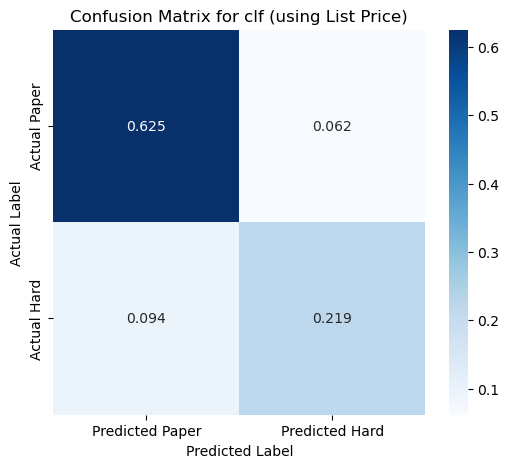

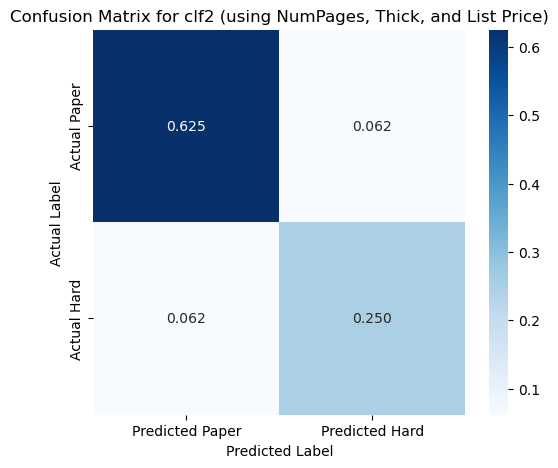

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Round confusion matrix values to 3 significant digits
conf_matrix_clf_rounded = np.round(conf_matrix_clf, 3)
conf_matrix_clf2_rounded = np.round(conf_matrix_clf2, 3)

# Plot confusion matrix for clf
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_clf_rounded, annot=True, fmt='.3f', cmap='Blues', xticklabels=["Predicted Paper", "Predicted Hard"], yticklabels=["Actual Paper", "Actual Hard"])
plt.title("Confusion Matrix for clf (using List Price)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Plot confusion matrix for clf2
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_clf2_rounded, annot=True, fmt='.3f', cmap='Blues', xticklabels=["Predicted Paper", "Predicted Hard"], yticklabels=["Actual Paper", "Actual Hard"])
plt.title("Confusion Matrix for clf2 (using NumPages, Thick, and List Price)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


8

The differences between the confusion matrices arise because one is evaluated on the training data, while the other is evaluated on the test data. The model typically performs better on the training data since it has already learned from it, potentially leading to overfitting. Evaluating the model on the test data provides a more accurate measure of how well it generalizes to new, unseen data. The confusion matrices for `clf` and `clf2` are better because they were evaluated on the correct test set, providing a fairer and more realistic assessment of the models' performance.

other:

1. **Proper Train-Test Split**:
   - The confusion matrices for `clf` and `clf2` were evaluated using the **correct test dataset**, ensuring that the models' ability to generalize was accurately assessed. Evaluating on unseen data (the test set) gives a clearer picture of the model's performance in real-world scenarios.
   
2. **No Overfitting**:
   - Since the evaluation was done on the test data and not on the training data, the confusion matrices for `clf` and `clf2` avoid the risk of **overfitting**, which could lead to overly optimistic metrics on the training set.

3. **Correct Dataset Selection**:
   - By using `ab_reduced_noNaN_test` for evaluation, the confusion matrices ensure that the models are tested on data that they have never seen before. This provides a fairer evaluation of their performance, as opposed to the potential data leakage (where the model may have memorized the training data).

addition:

1. **Training vs. Test Data**:
   - The first confusion matrix uses the **training dataset (`ab_reduced_noNaN_train`)** to evaluate the model's predictions. This means that the classifier is making predictions on data that it has already been trained on.
   - The second confusion matrix uses the **test dataset (`ab_reduced_noNaN_test`)** to evaluate the model's predictions. This data has not been seen by the model during training, and this represents how well the model generalizes to unseen data.

   **Why is this important?** The model may perform better on the training data because it has been specifically trained to recognize patterns in that dataset (this is called **overfitting** when the model performs well on training data but poorly on test data). Evaluating on the test data provides a more accurate assessment of the model's generalization capability.

9

based on the feature importance scores from the `clf2` model, the most important feature for making predictions is **List Price**. This means that when the decision tree is deciding whether a book is a hardcover or paperback, the **List Price** plays the largest role in the classification decision compared to the other features (`NumPages` and `Thick`). 

This result suggests that **List Price** is the key variable that influences the model's predictions the most, which could be due to how book prices often correlate with factors such as the type of cover (hardcover vs. paperback) and overall book quality.

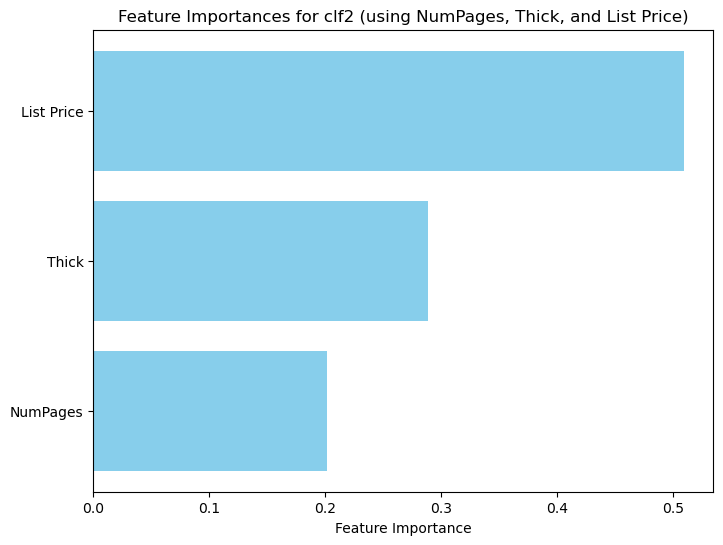

The most important feature for clf2 is: List Price


In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming clf2 has already been trained, with features 'NumPages', 'Thick', and 'List Price'
# These are the features you used to train clf2.
feature_names = ['NumPages', 'Thick', 'List Price']

# Get feature importances from clf2
importances = clf2.feature_importances_

# Create a bar plot to visualize feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances for clf2 (using NumPages, Thick, and List Price)')
plt.show()

# Optionally: Print the most important feature
most_important_feature = feature_names[np.argmax(importances)]
print(f"The most important feature for clf2 is: {most_important_feature}")


In [29]:
import numpy as np

# Get the feature names and their corresponding importances
feature_names = clf2.feature_names_in_
importances = clf2.feature_importances_

# Identify the most important feature
most_important_feature = feature_names[np.argmax(importances)]

# Report the feature importances
print("Feature Importances:")
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.3f}")

# Report the most important feature
print(f"\nThe most important feature for clf2 is: {most_important_feature}")


Feature Importances:
NumPages: 0.202
Thick: 0.289
List Price: 0.509

The most important feature for clf2 is: List Price


Here’s a summary of our chatbot session:

1. **Training the Decision Tree Models**: We discussed how to fit a decision tree classifier (`clf` and `clf2`) using different sets of features. You trained `clf` with the `List Price` variable to predict book type (hardcover vs. paperback), and `clf2` with `NumPages`, `Thick`, and `List Price` as features.

2. **Feature Importance**: You learned how to assess the importance of each feature in a decision tree using `clf2.feature_importances_` and `clf2.feature_names_in_`. Based on the fitted model, **List Price** was identified as the most important feature for making predictions about whether a book is hardcover or paperback.

3. **Visualization**: We discussed how to visualize feature importances using a bar plot and how to interpret the feature importance values for `clf2`. You were provided with the steps for creating this visualization using `matplotlib`.

4. **Confusion Matrix and Model Evaluation**: We explored the confusion matrix for both `clf` and `clf2`, calculated metrics like sensitivity, specificity, and accuracy, and interpreted their results. This helped in comparing the performance of the models and understanding their strengths.

5. **Decision Tree Complexity**: We discussed how decision trees make predictions, how feature importance is calculated, and how it relates to the complexity of the tree. The tree-building process involves evaluating different features for splits, and feature importances represent how much each feature contributed to reducing impurity in the decision tree.

Let me know if you need further clarifications or assistance!

https://chatgpt.com/share/672efb18-b410-800a-ba33-9bacd1a7d81f

11

In **linear regression**, coefficients directly represent the change in the target variable for a one-unit change in each predictor, offering a clear, quantitative understanding of how each feature influences the outcome. 

In **binary decision trees**, feature importances indicate how much each feature contributes to reducing prediction error by helping make informative splits, but they do not provide a direct measure of the magnitude or direction of a feature’s effect on the prediction. Feature importances reflect the relative contribution of features to model performance, not their specific impact on the outcome.

Here's a summary of our chatbot session:

- We discussed the differences in interpreting **coefficients in linear regression** versus **feature importances in decision trees**. 
  - **Linear regression** provides a direct interpretation of how each predictor affects the target (in terms of coefficients), indicating the amount of change in the target for a one-unit change in a predictor.
  - **Decision trees** use **feature importances** to show how much each feature helps improve the model’s prediction, but these importances do not indicate the direction or magnitude of the feature's influence on the outcome.
  
Let me know if you'd like further clarification or need help with another topic!

https://chatgpt.com/share/672efbbf-0e00-800a-a407-df2b04260fde

12

Yes.